In [ ]:
# !pip install "dask[complete]"

In [ ]:
# !python -m pip install 'dask[array]'

In [ ]:
# !pip install imutils

In [1]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import pandas as pd
import glob
import os
from tqdm import tqdm
import cv2
import time
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import dask as dd
import dask.array as da
from dask.distributed import Client, progress
from PIL import Image


def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

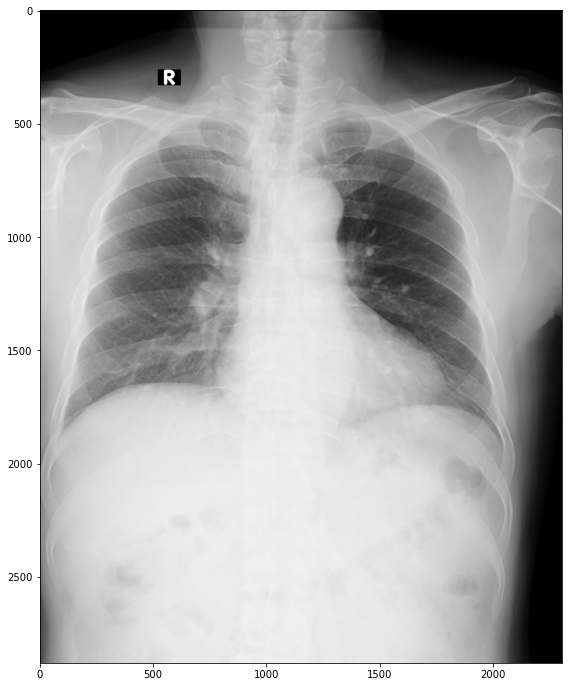

In [2]:
img = read_xray('train/0108949daa13dc94634a7d650a05c0bb.dicom')
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

In [3]:
# path to the data
train_dir = 'train/'
test_dir = 'test/'

train_dicom_files = glob.glob(f'{train_dir}/*.dicom')
print (f'Number of train files: {len(train_dicom_files)}')

test_dicom_files = glob.glob(f'{test_dir}/*.dicom')
print (f'Number of test files: {len(test_dicom_files)}')

Number of train files: 15000
Number of test files: 3000


# Resize to 1024 height

In [4]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h,w) = image.shape[:2]
    
    if width is None and height is None:
        return image
    
    if width is None:
        # calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w*r), height)
        
    else:
        r = width / float(w)
        dim = (width, int(h*r))
    
    # resize image
    img = cv2.resize(image, dim, interpolation=inter)
    
    # return the resized image
    return img

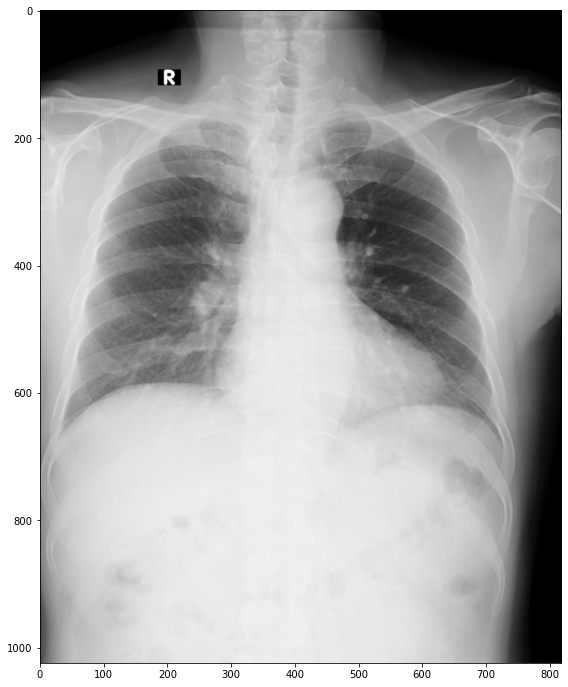

In [5]:
resized = resize(img, height=1024)
# resized = make_square(resized)
plt.figure(figsize = (12,12))
plt.imshow(resized, 'gray')

In [6]:
resized.shape

(1024, 819)

# Make jpg ouput directories

In [7]:
train_outdir = 'jpg_train/'

if not os.path.exists(train_outdir):
    os.mkdir(train_outdir)

In [8]:
test_outdir = 'jpg_test/'

if not os.path.exists(test_outdir):
    os.mkdir(test_outdir)

# Convert DICOM to JPG via openCV

In [ ]:
# # Convert DICOM to JPG/PNG via openCV

# test_list = [os.path.basename(x) for x in glob.glob(test_dir + './*.dicom')]

# for f in test_list:  
#     if not os.path.exists(test_dir + f[:-5] + 'jpg'):
#         img = read_xray(test_dir + f) # read dicom image
#         img = resize(img,height=1024)
#         cv2.imwrite(test_outdir + f.replace('.dicom','.jpg'),img) # write jpg image

In [ ]:
# Convert DICOM to JPG/PNG via openCV

train_list = [os.path.basename(x) for x in glob.glob(train_dir + './*.dicom')]

for f in train_list:
    if not os.path.exists(train_dir + f[:-5] + 'jpg'):
        img = read_xray(train_dir + f) # read dicom image
        img = resize(img,height=1024)
        cv2.imwrite(train_outdir + f.replace('.dicom','.jpg'),img) # write jpg image

/home/ubuntu/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "
/home/ubuntu/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


In [ ]:
# if not os.path.exists(test_dir + f[:-5] + 'jpg'):
#     print('hi')

In [ ]:
# test_dir + f[:-5] + 'jpg'

In [9]:
test_jpg_files = glob.glob(f'{test_outdir}/*.jpg')
print (f'Number of jpg_test files: {len(test_jpg_files)}')

Number of test files: 3000


In [11]:
train_jpg_files = glob.glob(f'{train_outdir}/*.jpg')
print (f'Number of jpg_train files: {len(train_jpg_files)}')

Number of train files: 15000
